In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## saving the wind generation data (the target variable) for all regions into dataframes

In [2]:
windgenDE = pd.read_csv("data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 s. startswith('DE_wind_generation')),
                        parse_dates=[0], index_col=0)

windgenAT = pd.read_csv("data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 s. startswith('AT_wind_onshore_generation')),
                        parse_dates=[0], index_col=0)

windgenFR = pd.read_csv("data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 s. startswith('FR_wind_onshore_generation')),
                        parse_dates=[0], index_col=0)

windgenPL = pd.read_csv("data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 s. startswith('PL_wind_onshore_generation')),
                        parse_dates=[0], index_col=0)

windgenDK = pd.read_csv("data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 s. startswith('DK_wind_onshore_generation')),
                        parse_dates=[0], index_col=0)

## saving the wind weather data (the features) into dataframes

In [3]:
windspeedDE = pd.read_csv("data/weather_data.csv",
                usecols=(lambda s: s.startswith('utc') | 
                         s.startswith('DE_windspeed')),
                parse_dates=[0], index_col=0)

windspeedAT = pd.read_csv("data/weather_data.csv",
                usecols=(lambda s: s.startswith('utc') | 
                         s.startswith('AT_windspeed')),
                parse_dates=[0], index_col=0)


windspeedFR = pd.read_csv("data/weather_data.csv",
                usecols=(lambda s: s.startswith('utc') | 
                         s.startswith('FR_windspeed')),
                parse_dates=[0], index_col=0)

windspeedPL = pd.read_csv("data/weather_data.csv",
                usecols=(lambda s: s.startswith('utc') | 
                         s.startswith('PL_windspeed')),
                parse_dates=[0], index_col=0)

windspeedDK = pd.read_csv("data/weather_data.csv",
                usecols=(lambda s: s.startswith('utc') | 
                         s.startswith('DK_windspeed')),
                parse_dates=[0], index_col=0)

## Next two cells are identical in purpose but if you get a tz-naive error you need to run the other block of code. The block of code needed differs based on system

In [4]:
# start_remove = pd.to_datetime('2016-01-01')
# end_remove = pd.to_datetime('2017-01-01')

# start_test = pd.to_datetime('2015-01-01')
# end_test = pd.to_datetime('2016-01-01')

In [5]:
start_remove = pd.to_datetime('2016-01-01', utc = True)
end_remove = pd.to_datetime('2017-01-01', utc = True)

start_test = pd.to_datetime('2015-01-01', utc = True)
end_test = pd.to_datetime('2016-01-01', utc = True)

## Limiting the data to just data from 2015 & 2016. Only these two years are consistent for most of the regions. Other years may be missing generation data

In [6]:
windspeedtrainDE = windspeedDE.loc[(windspeedDE.index >= start_remove) & (windspeedDE.index < end_remove)]
windgenerationtrainDE = windgenDE.loc[(windgenDE.index >= start_remove) & (windgenDE.index < end_remove)]

windspeedtestDE = windspeedDE.loc[(windspeedDE.index >= start_test) & (windspeedDE.index < end_test)]
windgenerationtestDE = windgenDE.loc[(windgenDE.index >= start_test) & (windgenDE.index < end_test)]

In [7]:
windspeedtrainAT = windspeedAT.loc[(windspeedAT.index >= start_remove) & (windspeedAT.index < end_remove)]
windgenerationtrainAT = windgenAT.loc[(windgenAT.index >= start_remove) & (windgenAT.index < end_remove)]

windspeedtestAT = windspeedAT.loc[(windspeedAT.index >= start_test) & (windspeedAT.index < end_test)]
windgenerationtestAT = windgenAT.loc[(windgenAT.index >= start_test) & (windgenAT.index < end_test)]

In [8]:
windspeedtrainFR = windspeedFR.loc[(windspeedFR.index >= start_remove) & (windspeedFR.index < end_remove)]
windgenerationtrainFR = windgenFR.loc[(windgenFR.index >= start_remove) & (windgenFR.index < end_remove)]

windspeedtestFR = windspeedFR.loc[(windspeedFR.index >= start_test) & (windspeedFR.index < end_test)]
windgenerationtestFR = windgenFR.loc[(windgenFR.index >= start_test) & (windgenFR.index < end_test)]

In [9]:
windspeedtrainPL = windspeedPL.loc[(windspeedPL.index >= start_remove) & (windspeedPL.index < end_remove)]
windgenerationtrainPL = windgenPL.loc[(windgenPL.index >= start_remove) & (windgenPL.index < end_remove)]

windspeedtestPL = windspeedPL.loc[(windspeedPL.index >= start_test) & (windspeedPL.index < end_test)]
windgenerationtestPL = windgenPL.loc[(windgenPL.index >= start_test) & (windgenPL.index < end_test)]

In [10]:
windspeedtrainDK = windspeedDK.loc[(windspeedDK.index >= start_remove) & (windspeedDK.index < end_remove)]
windgenerationtrainDK = windgenDK.loc[(windgenDK.index >= start_remove) & (windgenDK.index < end_remove)]

windspeedtestDK = windspeedDK.loc[(windspeedDK.index >= start_test) & (windspeedDK.index < end_test)]
windgenerationtestDK = windgenDK.loc[(windgenDK.index >= start_test) & (windgenDK.index < end_test)]

## changing the names of the columns in the features to one common name so that they concatenate properly

In [11]:
windspeedtrainFR = windspeedtrainFR.rename({"utc_timestamp": "timestamp", "FR_windspeed_10m": "windspeed"}, axis='columns')

In [12]:
windspeedtrainDE = windspeedtrainDE.rename({"utc_timestamp": "timestamp", "DE_windspeed_10m": "windspeed"}, axis='columns')

In [13]:
windspeedtrainAT = windspeedtrainAT.rename({"utc_timestamp": "timestamp", "AT_windspeed_10m": "windspeed"}, axis='columns')

In [14]:
windspeedtrainPL = windspeedtrainPL.rename({"utc_timestamp": "timestamp", "PL_windspeed_10m": "windspeed"}, axis='columns')

In [15]:
windspeedtrainDK = windspeedtrainDK.rename({"utc_timestamp": "timestamp", "DK_windspeed_10m": "windspeed"}, axis='columns')

In [16]:
windspeedformatted = pd.concat([windspeedtrainDE, windspeedtrainAT, windspeedtrainFR], sort=False)

## changing the names of the columns in the target variable to one common name so that they concatenate properly

In [17]:
windgenerationtrainFR = windgenerationtrainFR.rename({"utc_timestamp": "timestamp", "FR_wind_onshore_generation_actual": "wind_generation"}, axis='columns')

In [18]:
windgenerationtrainDE = windgenerationtrainDE.rename({"utc_timestamp": "timestamp", "DE_wind_generation_actual": "wind_generation"}, axis='columns')

In [19]:
windgenerationtrainAT = windgenerationtrainAT.rename({"utc_timestamp": "timestamp", "AT_wind_onshore_generation_actual": "wind_generation"}, axis='columns')

In [20]:
windgenerationtrainPL = windgenerationtrainPL.rename({"utc_timestamp": "timestamp", "PL_wind_onshore_generation_actual": "wind_generation"}, axis='columns')

In [21]:
windgenerationtrainDK = windgenerationtrainDK.rename({"utc_timestamp": "timestamp", "DK_wind_onshore_generation_actual": "wind_generation"}, axis='columns')

In [22]:
windgenerationtrainDE = windgenerationtrainDE / 82180000

In [23]:
windgenerationtrainAT = windgenerationtrainAT / 8700000

In [24]:
windgenerationtrainPL = windgenerationtrainPL / 37970000

In [25]:
windgenerationtrainDK = windgenerationtrainDK / 5800000

In [26]:
windgenerationdataformatted = pd.concat([windgenerationtrainDE, windgenerationtrainAT, windgenerationtrainFR], sort=False)

## The wind generation data is measured in Mega Watts and even then has a large magnitude. Here changing the magnitude so that it's in Giga Watts

In [27]:
windgenerationdataformatted = windgenerationdataformatted * 1e-3

In [28]:
# windgenerationtestFR = windgenerationtestFR * 1e-3

In [29]:
windgenerationtestPL = windgenerationtestPL * 1e-3

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [31]:
#function to print out generation averages for hour and day. This is used as a visual representation of the data
#later will throw train data and predicted data to see how they fair
#summing up all the hourly generation numbers to product the total production for the year
#then doing division for the averages
def energy_production(energy):
    total_energy = np.sum(energy)
    avg_energy_per_hour = total_energy / energy.shape[0]
    avg_energy_per_day = total_energy / (energy.shape[0] / 24)
    print("Energy Data measured in Giga Watts")
    print("Total energy:", total_energy)
    print("Average Energy Per Hour:", avg_energy_per_hour)
    print("Average Energy Per Day:", avg_energy_per_day)

## Creating the model fitting on the concatenated dataset and predicting on FR

In [32]:
# fitting the model with the concatenated dataset and target variables
model = LinearRegression().fit(windspeedformatted,windgenerationdataformatted)

In [33]:
# using trained model to predict on new set of wind features
prediction = model.predict(windspeedtestPL)

In [34]:
timeseries = pd.date_range('2015-01-01', '2015-12-31 23:00:00', freq='H')

C:\Users\hong8\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


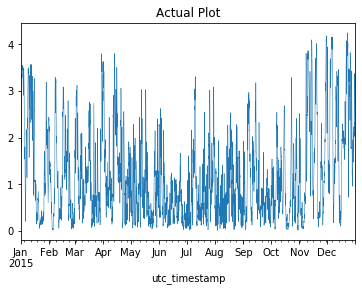

In [35]:
windgenerationtestPL.plot(linewidth=0.5, title='Actual Plot', legend=False)

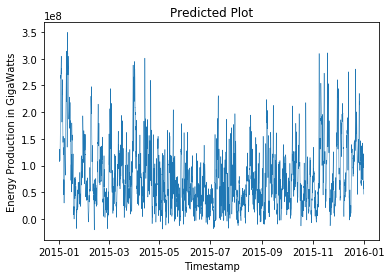

In [36]:
prediction = prediction * 66600000
plt.plot(timeseries,prediction, linewidth=0.5)
plt.xlabel('Timestamp')
plt.ylabel('Energy Production in GigaWatts')
plt.title('Predicted Plot')
plt.show()

In [37]:
print(r2_score(windgenerationtestPL, prediction))

-1.0411225438389548e+16


In [38]:
print(mean_squared_error(windgenerationtestPL, prediction))

1.0205954849322526e+16


In [39]:
energy_production(windgenerationtestPL)

Energy Data measured in Giga Watts
Total energy: PL_wind_onshore_generation_actual    10644.233554
dtype: float64
Average Energy Per Hour: PL_wind_onshore_generation_actual    1.215095
dtype: float64
Average Energy Per Day: PL_wind_onshore_generation_actual    29.162284
dtype: float64


In [40]:
energy_production(prediction)

Energy Data measured in Giga Watts
Total energy: 709435020272.0471
Average Energy Per Hour: 80985732.90776794
Average Energy Per Day: 1943657589.7864304
